# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltools.data import Brain_Data
import nilearn as nil
from pathlib import Path
from nltools.mask import expand_mask
import os

base_dir = Path(os.getcwd()).parent 
data_dir = base_dir / 'data'

## Get parcellations

In [ ]:
# Download parcellations (caches files so will be faster the 2nd time)
yeo = nil.datasets.fetch_atlas_yeo_2011()
difumo = nil.datasets.fetch_atlas_difumo()

/var/folders/g3/k36shgps5c75hyl9xhjk3cb80000gn/T/ipykernel_15265/3852331661.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yeo_brain.data = yeo_brain.data.astype(np.int)


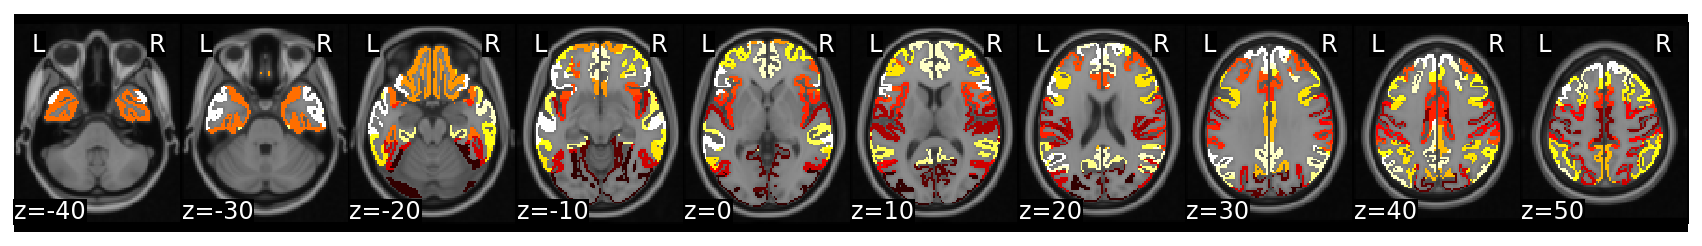

In [3]:
# Load yeo data
yeo_brain = Brain_Data(yeo['thin_17'])
# Convert to boolean index
yeo_brain.data = yeo_brain.data.astype(np.int)
yeo_brain.plot()

# Expand each separate network into Network x Voxel 2 representation for looping below
yeo_brain_expanded = expand_mask(yeo_brain)

## Load rest run

In [4]:
rest = Brain_Data(data_dir / 'rest_denoised.nii.gz')
# Time x Voxel representation
rest

nltools.data.brain_data.Brain_Data(data=(180, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

In [5]:
# Just mask 1 network
# 2d representation: 

# Returns Time x Voxels
rest.apply_mask(yeo_brain_expanded[0])

nltools.data.brain_data.Brain_Data(data=(180, 3758), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

In [6]:
# Just mask 1 network
# 4d representation: 

# X x Y x Z x time for each network
# 4d with 0s for locations that are outside of mask
rest.apply_mask(yeo_brain_expanded[0]).to_nifti().get_fdata().shape

(91, 109, 91, 180)

In [95]:
# Loop over all 17 network
for network in yeo_brain_expanded:
    # Extract time x voxels for each network
    # 2d voxels dim changes
    network_2d = rest.apply_mask(network).data

    # Extract X x Y x Z x time for each network
    # 4d with 0s for locations that are outside of mask
    network_4d = rest.apply_mask(network).to_nifti().get_fdata()

In [ ]:
# Apply mapper...

## Movie data 

In [ ]:
movie = Brain_Data(data_dir / 'movie_denoised.h5')
movie

nltools.data.brain_data.Brain_Data(data=(1364, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

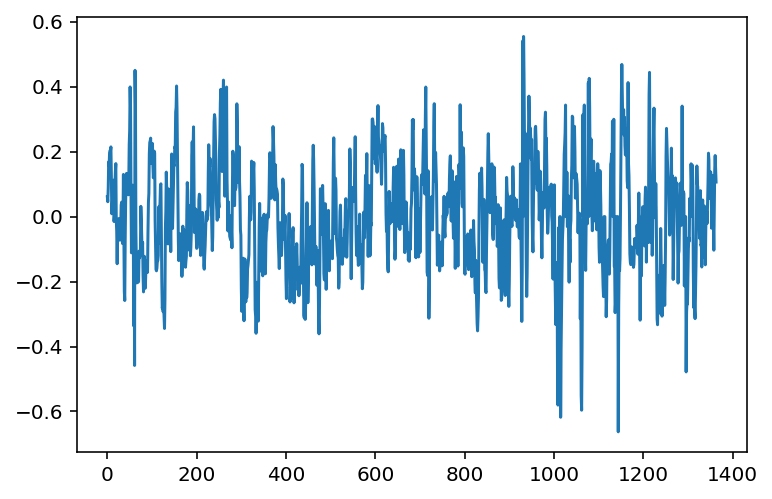

In [ ]:
# Plot average time-series signal across whole-brain
plt.plot(movie.mean(axis=1))

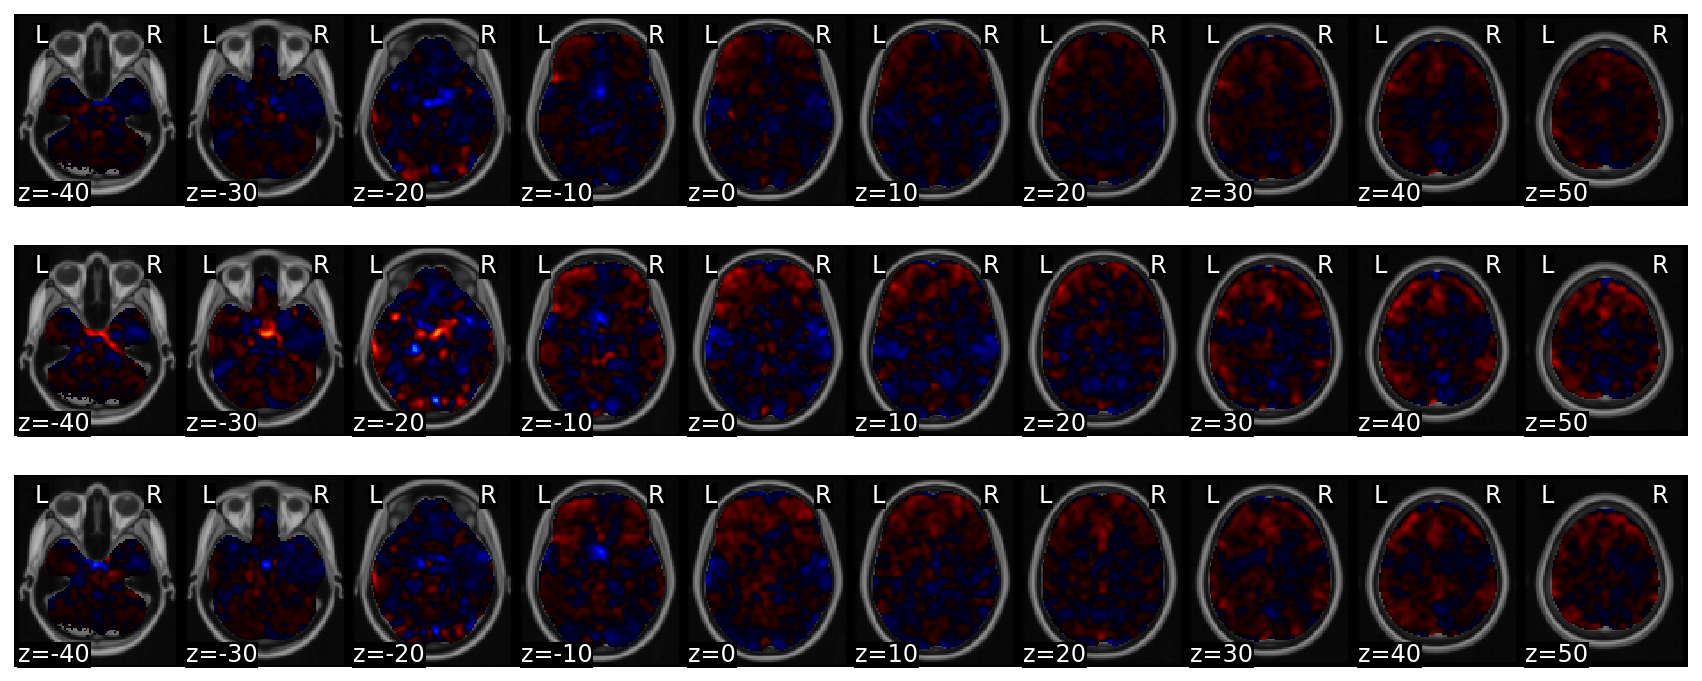

In [ ]:
# Plot first few TRs
movie[:3].plot()